# Problem 1

We thought that regression can be used to predict what search topics could be trending in the future, classification could be used to classify queries as interrogative (which could lead to a different machine learning model, a la Google), and anomaly detection could be used to deter hackers and unethical spammers.

# Problem 2

We are given a sequence of N iid random variables with the exponential distribution $f_{X}(x) = \lambda e^{-\lambda x}$. We are trying to find the maximum likelihood estimate for $\lambda$. Because the terms of this sequence are independent, we know that the likelihood function must equal the product of their densities:

$$ L(x_1, x_2, ..., x_i, ..., x_N|\lambda) = \prod_{i=1}^{N} f_{X}(x_i|\lambda) $$

We can rewrite this as:

$$ \lambda^{N}exp\bigg(-\lambda \sum_{i=1}^{N}x_i\bigg). $$

Now, we can find the log-likelihood function by taking the natural log of that equation:

$$ ln(L(x_1, x_2, ..., x_i, ..., x_N | \lambda))
= ln(\lambda^{N}exp\bigg(-\lambda \sum_{i=1}^{N}x_i\bigg))\\
= ln(\lambda^{N}) + ln(exp\bigg(-\lambda \sum_{i=1}^{N}x_i\bigg))\\
= Nln(\lambda) - \lambda \sum_{i=1}^{N}x_i $$

We can now maximize the log likelihood by taking the derivative of the above equation and setting it equal to zero to get our maximum likelihood estimate for $\lambda$:

$$ \frac{d}{dx}ln(L(x_1, x_2, ..., x_i, ..., x_N | \lambda)) = 0\\
\frac{d}{dx}(Nln(\lambda) - \lambda \sum_{i=1}^{N}x_i = 0\\
\frac{N}{\lambda} - \sum_{i=1}^{N}x_i = 0\\
\frac{N}{\lambda} = \sum_{i=1}^{N}x_i\\
\lambda = \frac{N}{\sum_{i=1}^{N}x_i} $$

# Problem 3

Suppose X and Y are two random variables whose joint distribution is Normal (Gaussian), centered at
(0,0) and with correlation $\rho$. Consider 2 cases:

i) $\sigma_{x}^{2} = 4; \sigma_{y}^{2} = 9; \rho = 0$

ii) $\sigma_{x}^{2} = 4; \sigma_{y}^{2} = 9; \rho = 0.5$

In [93]:
%matplotlib inline

In [94]:
import numpy as np
import scipy as sp
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import multivariate_normal

In [95]:
# Get current size
fig_size = plt.rcParams["figure.figsize"]

# Set figure width to 8 and height to 6
fig_size[0] = 8
fig_size[1] = 6
plt.rcParams["figure.figsize"] = fig_size

In [96]:
def plot_contours(u_x, u_y, var_x, var_y, std_x, std_y, rho):
    # Mean vector and Covariance matrix
    mean = [u_x, u_y]
    cov = [(var_x, std_x * std_y * rho),
           (std_x * std_y * rho, var_y)]

    x, y = np.random.multivariate_normal(mean, cov, size=50).T
    ax = sns.kdeplot(x, y)
#     fig1 = plt.figure()
#     ax = fig1.add_subplot(111)
#     ax.plot(x, y)
#     xc = np.arange(-3.0, 3.0, 0.1)
#     yc = np.arange(-3.0, 3.0, 0.1)
#     X, Y = np.meshgrid(xc, yc)

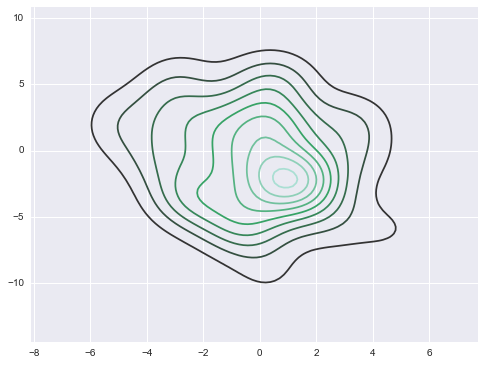

In [97]:
# 3a, part i
u_x = 0
u_y = 0
var_x = 4
var_y = 9
std_x = var_x**(1/2)
std_y = var_y**(1/2)
rho = 0
    
plot_contours(u_x, u_y, var_x, var_y, std_x, std_y, rho)

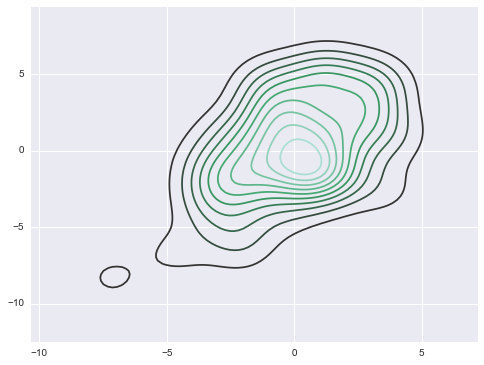

In [98]:
# 3a, part ii
rho = 0.5

plot_contours(u_x, u_y, var_x, var_y, std_x, std_y, rho)

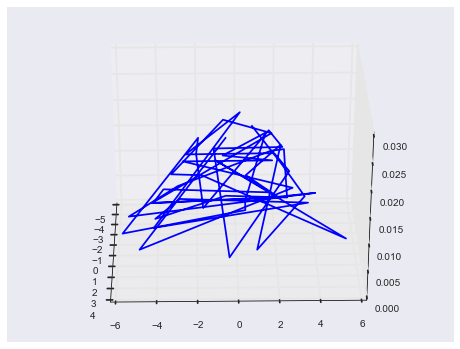

In [76]:
# Problem 3b

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

rho = 0
mean = [u_x, u_y]
cov = [(var_x, std_x * std_y * rho),
       (std_x * std_y * rho, var_y)]

X, Y = np.random.multivariate_normal(mean, cov, size=50).T
Z = mpl.mlab.bivariate_normal(X, Y, sigmax=2.0, sigmay=3.0, mux=0.0, muy=0.0, sigmaxy=0.0)

ax.plot_wireframe(X, Y, Z, rstride=5, cstride=5)

for angle in range(0, 360):
    ax.view_init(30, angle)
    plt.draw()

# Problem 4

In [99]:
import pandas as pd

student_data = pd.read_csv("studentdata.csv", sep=' ', quoting=1)

print(student_data.shape)
student_data = student_data.dropna()
student_data.head()

(657, 11)


,Student,Height,Gender,Shoes,Number,Dvds,ToSleep,WakeUp,Haircut,Job,Drink
1,1,67,female,10,5,10,-2.5,5.5,60,30.0,water
2,2,64,female,20,7,5,1.5,8.0,0,20.0,pop
3,3,61,female,12,2,6,-1.5,7.5,48,0.0,milk
4,4,61,female,3,6,40,2.0,8.5,10,0.0,water
5,5,70,male,4,5,6,0.0,9.0,15,17.5,pop


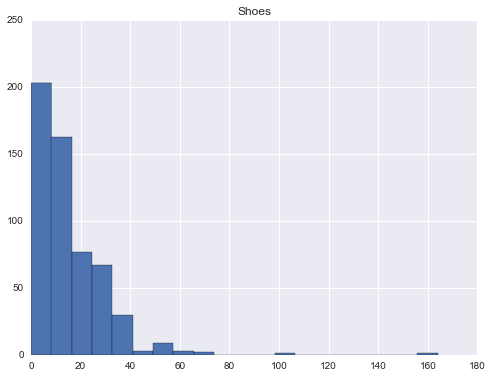

In [100]:
shoes_histogram = plt.hist(student_data.Shoes.values, bins=20)
plt.title('Shoes')
sns.despine()

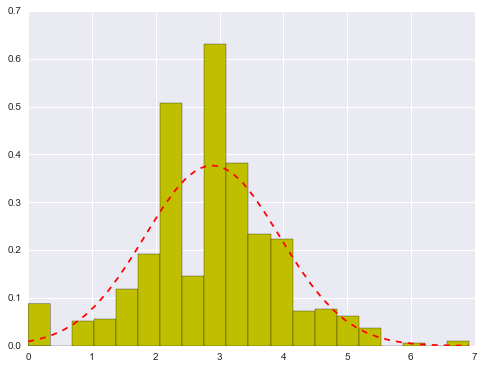

In [101]:
# Based on http://stackoverflow.com/questions/26406056/a-lognormal-distribution-in-python/26442781#26442781
from scipy.stats import lognorm, norm

(s, loc, scale) = lognorm.fit(student_data.Dvds.values, floc=0)
estimated_mu, estimated_sigma = np.log(scale), s

logdata = np.log(student_data.Dvds.values+1)
plt.hist(logdata, bins=20, normed=True, color='y')

x = np.linspace(logdata.min(), logdata.max(), 40)
pdf = norm.pdf(x, loc=estimated_mu, scale=estimated_sigma)
plt.plot(x, pdf, 'r--')

sns.despine()

In [104]:
student_data.Haircut.describe(percentiles=[.025, .25, .5, .75, .975])

count    559.000000
mean      26.228569
std       27.782842
min        0.000000
2.5%       0.000000
25%       10.000000
50%       17.000000
75%       30.000000
97.5%    100.450000
max      180.000000
Name: Haircut, dtype: float64

In [105]:
drinks_by_gender = student_data.groupby(['Gender', 'Drink']).count().Student  # kinda hacky, but it gets us the counts
print(drinks_by_gender)

Gender  Drink
female  milk      55
        pop       94
        water    215
male    milk      42
        pop       60
        water     93
Name: Student, dtype: int64


In [82]:
male_counts = drinks_by_gender['male']
female_counts = drinks_by_gender['female']

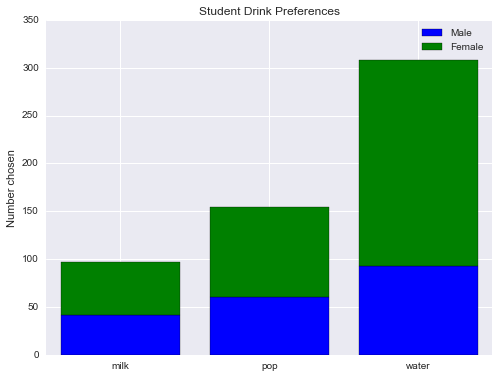

In [83]:
# based on http://matplotlib.org/examples/pylab_examples/bar_stacked.html
male_bars = plt.bar(
    range(len(male_counts)), 
    male_counts.values, 
    align='center', 
    color='b'
)
female_bars = plt.bar(
    range(len(female_counts)), 
    female_counts.values, 
    align='center', 
    bottom=male_counts.values, 
    color='g'
)
plt.xticks(range(len(male_counts)), male_counts.keys())

plt.ylabel('Number chosen')
plt.title('Student Drink Preferences')
plt.legend((male_bars[0], female_bars[0]), ('Male', 'Female'))
sns.despine()

/Users/rohannagar/anaconda/lib/python3.5/site-packages/matplotlib/__init__.py:892: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


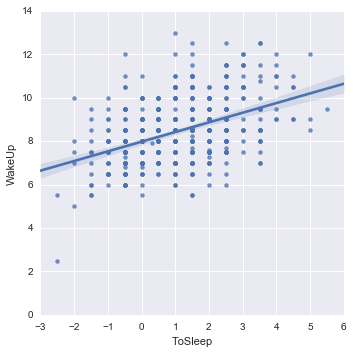

In [84]:
sns.lmplot("ToSleep", "WakeUp", student_data)
# There is a positive coorelation

# Problem 5

In [85]:
from sklearn import datasets, linear_model
from sklearn.cross_validation import train_test_split

# Load the data
data = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data",
                   delim_whitespace=True, header=None,
                   names = ['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax', 'ptratio',
                            'b', 'lstat', 'medv'])
print(data.shape)
data = data.dropna()
data.head()

(506, 14)


,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [86]:
# Part A, simple linear regression
regr = linear_model.LinearRegression()
regr.fit(data[['lstat']], data[['medv']])
print('lstat coefficient: {0}'.format(np.squeeze(regr.coef_)))

lstat coefficient: -0.9500493537579906


This coefficient implies that as the value of lstat gets larger, the value of medv will get smaller at almost a 1:1 ratio.

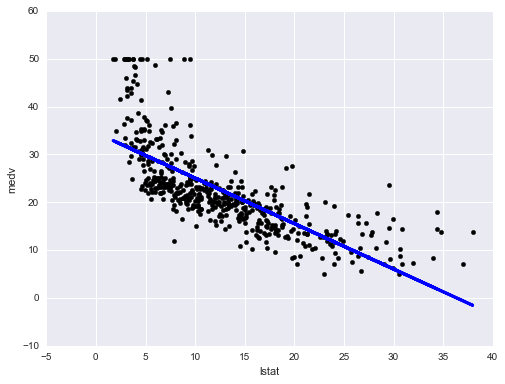

In [87]:
# Part B, plot with regression line
plt.scatter(data[['lstat']], data[['medv']], color='black')
plt.plot(data[['lstat']], regr.predict(data[['lstat']]), color='blue', linewidth=3)
plt.xlabel('lstat')
plt.ylabel('medv')
sns.despine()

There is a negative correlation here. The fit of the line is fairly good. However, there are data points much higher above the regression line on the upper left part of the plot that seem to be pulling the regression line up higher than the congregation of data below that line. But overall, the the regression seems to fit the data well.

In [88]:
# Part C, multiple linear regression
indep_vars = ['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax', 'ptratio', 'b', 'lstat']
dep_vars = ['medv']
indep_data = data[indep_vars]
dep_data = data[dep_vars]
indep_train, indep_test, dep_train, dep_test = train_test_split(indep_data, dep_data, test_size=0.33, random_state=42)

In [89]:
regr = linear_model.LinearRegression()
regr.fit(indep_train, dep_train)
print('Coefficients: {0}'.format(zip(indep_vars,np.squeeze(regr.coef_))))

Coefficients: <zip object at 0x10cc33cc8>


In [90]:
regr_predict = regr.predict(indep_test)
print("Residual sum of squares: %.2f"
      % np.mean((regr_predict - dep_test) ** 2))

Residual sum of squares: 20.72


# DISCUSS RESULTS OF PART C HERE

In [91]:
# Part D, MLR on LMEDV
indep_vars = ['crim', 'zn', 'chas', 'rm', 'lstat']
dep_vars = ['medv']
indep_data = data[indep_vars]
dep_data = data[dep_vars]
indep_train, indep_test, dep_train, dep_test = train_test_split(indep_data, dep_data, test_size=0.3084, random_state=42)

In [92]:
regr = linear_model.LinearRegression()
regr.fit(indep_train, dep_train)
print('Coefficients: {0}'.format(zip(indep_vars,np.squeeze(regr.coef_))))

Coefficients: <zip object at 0x10b6e3548>
